# SciPy 시작하기

## SciPy란

* 과학기술계산용 함수 및 알고리즘 제공
* Home
 * http://www.scipy.org/
* Documentation
 * http://docs.scipy.org/doc/
* Tutorial
 * http://docs.scipy.org/doc/scipy/reference/tutorial/index.html
 * http://www.scipy-lectures.org/intro/scipy.html

## SciPy Subpackages

* scipy.stats	    
 * 통계 Statistics 
* scipy.constants	
 * 물리/수학 상수 Physical and mathematical constants
* scipy.special  	
 * 수학 함수 Any special mathematical functions
* scipy.linalg	    
 * 선형 대수 Linear algebra routines
* scipy.interpolate	
 * 보간 Interpolation
* scipy.optimize	
 * 최적화 Optimization
* scipy.fftpack 
 * Fast Fourier transforms

## scipy.stats 통계

* Random Variable 
 * 확률 밀도 함수, 누적 확률 함수
 * 샘플 생성
 * Parameter Estimation (fitting)
* Test 

## scipy.stats 에서 제공하는 확률 모형

* http://docs.scipy.org/doc/scipy/reference/stats.html
* Continuous
 * http://docs.scipy.org/doc/scipy/reference/tutorial/stats/continuous.html#continuous-distributions-in-scipy-stats
 * `uniform`:	A uniform continuous random variable.
 * `norm`:	A normal continuous random variable.
 * `beta`:	A beta continuous random variable.
 * `gamma`:	A gamma continuous random variable.
 * `t`:	A Student’s T continuous random variable.
 * `chi2`:	A chi-squared continuous random variable.
 * `f`:	An F continuous random variable.
 * `multivariate_normal`:	A multivariate normal random variable.
 * `dirichlet`:	A Dirichlet random variable.
 * `wishart`: A Wishart random variable.
* Discrete
 * http://docs.scipy.org/doc/scipy/reference/tutorial/stats/discrete.html#discrete-distributions-in-scipy-stats
 * `bernoulli`: 	A Bernoulli discrete random variable.
 * `binom`: 	A binomial discrete random variable.
 * `boltzmann`: 	A Boltzmann (Truncated Discrete Exponential) random variable.


*  random variable 사용 방법
 1. 파라미터를 주고 random variable object 생성
 2. method 사용


* Common Method 
 * `rvs`: 샘플 생성
 * `pdf` or `pmf`: Probability Density Function
 * `cdf`: Cumulative Distribution Function
 * `stats`: Return mean, variance, (Fisher’s) skew, or (Fisher’s) kurtosis
 * `moment`: non-central moments of the distribution
 * `fit`: parameter estimation 

* Common Parameters
 * parameter는 모형 마다 달라진다.
 * `random_state`: seed
 * `size`: 생성하려는 샘플의 shape
 * `loc`: 일반적으로  평균의 값
 * `scale`: 일반적으로 표준편차의 값

In [1]:
rv = sp.stats.norm(loc=10, scale=10)
rv.rvs(size=(3, 10), random_state=1)

array([[ 26.24345364,   3.88243586,   4.71828248,  -0.72968622,
         18.65407629, -13.01538697,  27.44811764,   2.38793099,
         13.19039096,   7.50629625],
       [ 24.62107937, -10.60140709,   6.77582796,   6.15945645,
         21.33769442,  -0.99891267,   8.27571792,   1.22141582,
         10.42213747,  15.82815214],
       [ -1.00619177,  21.4472371 ,  19.01590721,  15.02494339,
         19.00855949,   3.16272141,   8.77109774,   0.64230566,
          7.3211192 ,  15.30355467]])

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


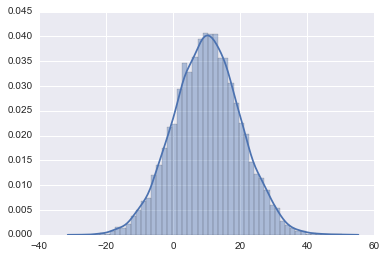

In [2]:
sns.distplot(rv.rvs(size=10000, random_state=1))

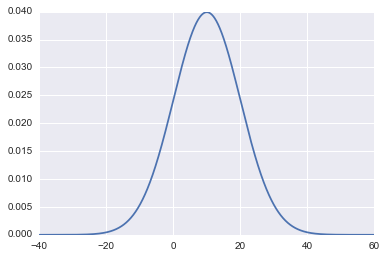

In [3]:
xx = np.linspace(-40, 60, 1000)
pdf = rv.pdf(xx)
plt.plot(xx, pdf)

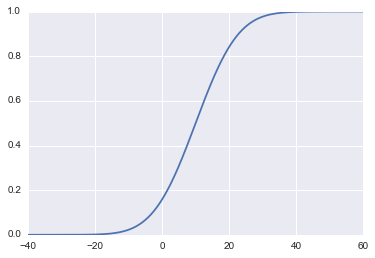

In [4]:
cdf = rv.cdf(xx)
plt.plot(xx, cdf)

## scipy.constants	 상수

* 특별 상수 
 * `scipy.pi`
* 기타 상수
 * `scipy.constants.XXXX`

* 단위
 * yotta, zetta, exa, peta, tera, giga, mega, kilo, hecto, deka
 * deci, centi, milli, micro, nano, pico, femto, atto, zepto
 * lb, oz, degree
 * inch, foot, yard, mile, au, light_year, parsec
 * hectare, acre, gallon
 * mph, mach, knot

In [5]:
sp.pi

3.141592653589793

In [6]:
import scipy.constants

In [7]:
sp.constants.c # speed of light

299792458.0

## scipy.special  	 수학 함수

* Gamma, Beta, Erf, Logit
* Bessel,  Legendre

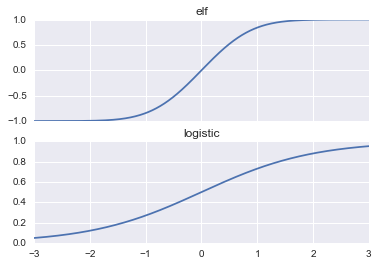

In [8]:
x = np.linspace(-3, 3, 1000)
y1 = sp.special.erf(x)
a = plt.subplot(211)
plt.plot(x, y1)
plt.title("elf")
a.xaxis.set_ticklabels([])
y2 = sp.special.expit(x)
plt.subplot(212)
plt.plot(x, y2)
plt.title("logistic")

## scipy.linalg	선형대수

* inv, pinv, det

In [9]:
A = np.array([[1, 2],
             [3, 4]])
sp.linalg.inv(A)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [10]:
sp.linalg.det(A)

-2.0

## scipy.interpolate 보간

* 자료 사이의 빠진 부분을 유추
* 1차원 보간
* 2차원 보간

* interpolate는 점들 간 이어지게끔 하는 곡선(선형과 거의 유사함)
* 하지만 데이터분석에서는 안 쓴다. 과최적화가 걸린다. 예쁘게 만들기 위해서만 쓴다.

In [11]:
from scipy.interpolate import interp1d

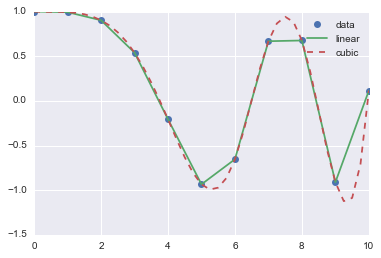

In [12]:
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')
xnew = np.linspace(0, 10, num=41)
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'])

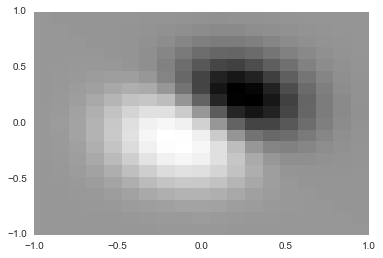

In [13]:
x, y = np.mgrid[-1:1:20j, -1:1:20j]
z = (x+y) * np.exp(-6.0*(x*x+y*y))
plt.pcolormesh(x, y, z)

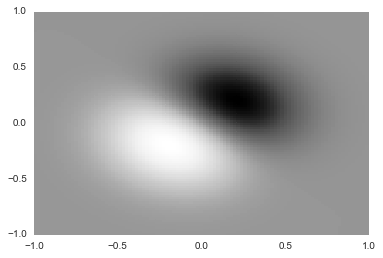

In [14]:
xnew, ynew = np.mgrid[-1:1:100j, -1:1:100j]
tck = sp.interpolate.bisplrep(x, y, z, s=0)
znew = sp.interpolate.bisplev(xnew[:, 0], ynew[0, :], tck)
plt.pcolormesh(xnew, ynew, znew)

## scipy.optimize	최적화

* 함수의 최소값 찾기

In [15]:
from scipy import optimize

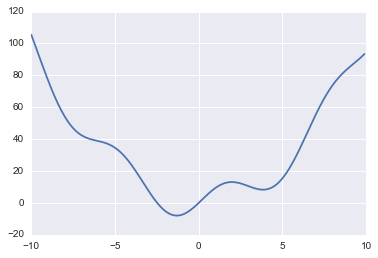

In [16]:
def f(x):
    return x**2 + 10*np.sin(x)
x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x))

In [28]:
result = optimize.minimize(f, 4)
print(result)
x0 = result['x']
x0

      fun: 8.315585579479809
 hess_inv: array([[ 0.1186092]])
      jac: array([  6.43730164e-06])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([ 3.83746785])


array([ 3.83746785])

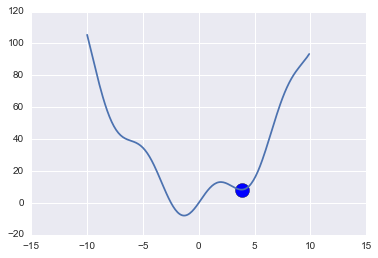

In [29]:
plt.plot(x, f(x));
plt.hold(True)
plt.scatter(x0, f(x0), s=200)

In [31]:
def sixhump(x):
    return (4 - 2.1*x[0]**2 + x[0]**4 / 3.) * x[0]**2 + x[0] * x[1] + (-4 + \
        4*x[1]**2) * x[1] **2

In [34]:
x = np.linspace(-2, 2)
y = np.linspace(-1, 1)
xg, yg = np.meshgrid(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ValueError: Unknown projection '3d'

In [35]:
x = np.linspace(-2, 2)
y = np.linspace(-1, 1)
xg, yg = np.meshgrid(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xg, yg, sixhump([xg, yg]), rstride=1, cstride=1,
                       cmap=plt.cm.jet, linewidth=0, antialiased=False)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Six-hump Camelback function')
plt.show()

ValueError: Unknown projection '3d'

In [36]:
x1 = optimize.minimize(sixhump, (1, 1))['x']
x2 = optimize.minimize(sixhump, (-1, -1))['x']
print(x1, x2)

[ 0.08984198 -0.71265642] [-0.08984199  0.7126564 ]


## scipy.fftpack 고속 퓨리에 변환 Fast Fourier transforms

* 신호를 주파수(frequency)영역으로 변환
* 스펙트럼(spectrum)

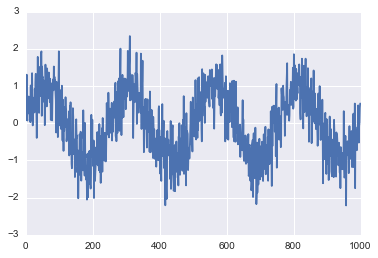

In [37]:
time_step = 0.02
period = 5.
time_vec = np.arange(0, 20, time_step)
sig = np.sin(2 * np.pi / period * time_vec) + 0.5 * np.random.randn(time_vec.size)
plt.plot(sig)

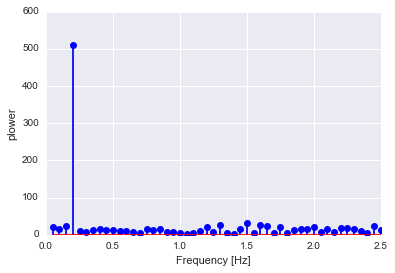

In [38]:
import scipy.fftpack
sample_freq = sp.fftpack.fftfreq(sig.size, d=time_step)
sig_fft = sp.fftpack.fft(sig)
pidxs = np.where(sample_freq > 0)
freqs, power = sample_freq[pidxs], np.abs(sig_fft)[pidxs]
freq = freqs[power.argmax()]
plt.stem(freqs[:50], power[:50])
plt.xlabel('Frequency [Hz]')
plt.ylabel('plower')